 # WALMART_DATA

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


## Problem Statment
* Outlier detection of purchase columns
* What is the 50%,90% confidence interval of purchasing ?
* What is the 90% confidence interval of purchasing by male?
* What is the maximum amount of purchase by male
* What is the 90% confidence interval of purchasing by famale?
* What is the maximum amount of purchase by female?
* Distribution of the mean of the expenses by female and male customers of different sample size
* Marital_status
* What is the 90% confidence interval of unmarried
* What is the 90% confidence interval of married
* Distribution of mean expenses by married and unmarried in different sample_size
* which age category done more purchase?
* Distribution of mean expenses by Age
   * What is the 90% of confidence interval of persons who have age 0-17
   * What is the 90% of confidence interval of persons who have age 18-25
   * What is the 90% of confidence interval of persons who have age 26-35
   * What is the 90% of confidence interval of persons who have age 36-50
   * What is the 90% of confidence interval of persons who have age 51+
* Gender influence
   * Which gender done more transaction?
* City category
   * Which city have more purchase rate ?
   * Which product purchase mostly in all cities?
* Product category v/s purchases
   * Which producct took more rate in city A?
   * Which product took more purchase rate purchased by male and women in city A ?
   * Which producct took more rate in city B?
   * Which product took more purchase rate purchased by male and women in city B ?
   * Which producct took more rate in city C?
   * Which product took more purchase rate purchased by male and women in city C?
* Age v/s Purchase v/s City_category
* Female purchasing in different city
* Male purchasing in different city
* Correlation
* Top 10 users who purchase more product
* How many customer belongs to each occupation on each city_category?
* Percentage of each occupation 
* How customers stay_year related in purchase?
* Which amount of selling is mostly repeated?

# Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.utils import resample

In [4]:
df=pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [5]:
df.shape

(550068, 10)

* Data contain 550068 rows
* 10 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
# checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

* Data have no null values

In [9]:
ds=pd.DataFrame([df.User_ID,df.Occupation,df.Marital_Status,df.Product_Category,df.Purchase])
dr=ds.T
dr

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
0,1000001,10,0,3,8370
1,1000001,10,0,1,15200
2,1000001,10,0,12,1422
3,1000001,10,0,12,1057
4,1000002,16,0,8,7969
...,...,...,...,...,...
550063,1006033,13,1,20,368
550064,1006035,1,0,20,371
550065,1006036,15,1,20,137
550066,1006038,1,0,20,365


In [10]:
for i in dr.columns:
    print(i,':',dr[i].median())
    

User_ID : 1003077.0
Occupation : 7.0
Marital_Status : 0.0
Product_Category : 5.0
Purchase : 8047.0


In [11]:
# finding outliers in purchase
s1=np.percentile(df.Purchase,25)
s1


5823.0

In [12]:
s2=np.percentile(df.Purchase,50)
s2

8047.0

In [13]:
s3=np.percentile(df.Purchase,75)
s3

12054.0

In [14]:
IQR=np.percentile(df.Purchase,75)-(np.percentile(df.Purchase,25))
IQR

6231.0

In [15]:
UPPER=(np.percentile(df.Purchase,75))+1.5*IQR
LOWER=(np.percentile(df.Purchase,25))-1.5*IQR
LOWER

-3523.5

In [16]:
UPPER

21400.5

In [17]:
data=df[(df.Purchase>-3523.5) & (df.Purchase<21400.5)]
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [18]:
550068-547391

2677

[]

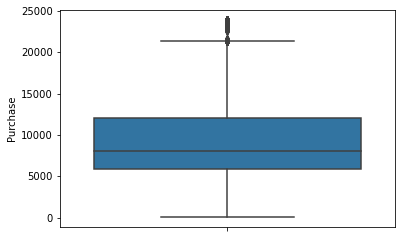

In [19]:
sns.boxplot(y=df.Purchase,data=df)
plt.plot()

[]

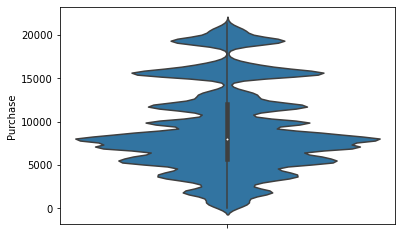

In [20]:
sns.violinplot(y=data.Purchase,data=data)
plt.plot()

* There foundout 2677 outliers from the data

[]

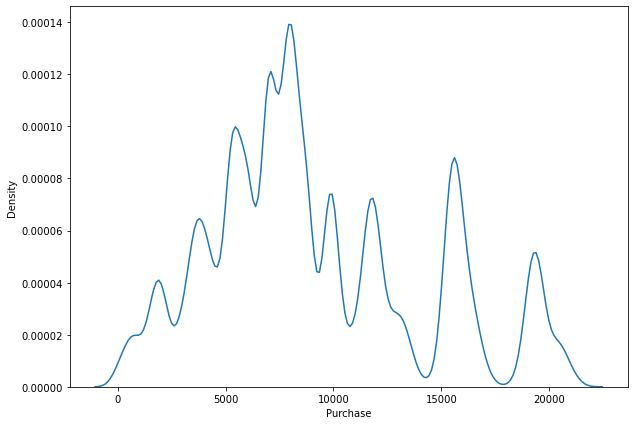

In [21]:
plt.figure(figsize=(10,7))
sns.kdeplot(data.Purchase)
plt.plot()

[]

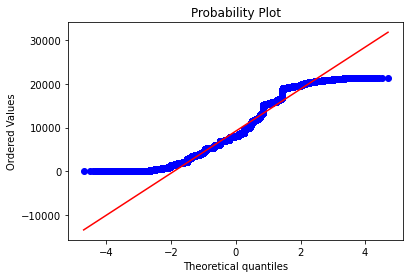

In [22]:
stats.probplot(data.Purchase,dist='norm',plot=plt)
plt.plot()

In [23]:
# bootstraping
iteration=1000
bootstrap_mean1=[]
sample_size=50000
for i in  range(iteration):
    s=resample(data['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_mean1.append(m)
confidence=.50
LOWER,UPPER=np.percentile(bootstrap_mean1,[25,75])
print(LOWER)
print(UPPER)

9179.809345
9210.87987


[]

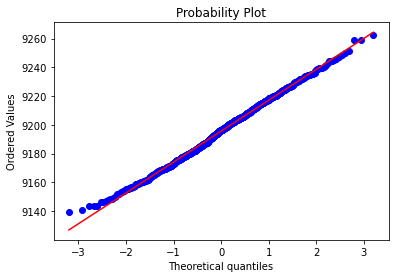

In [24]:
stats.probplot(bootstrap_mean1,dist='norm',plot=plt)
plt.plot()

[]

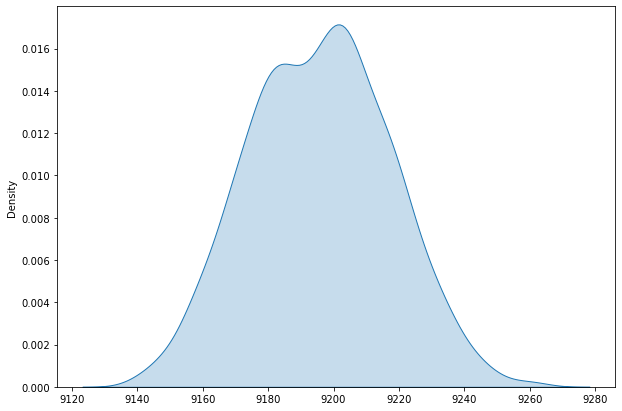

In [25]:
plt.figure(figsize=(10,7))
sns.kdeplot(bootstrap_mean1,fill=True)
plt.plot()

In [26]:
np.mean(bootstrap_mean1)


9195.66281866

In [27]:
np.std(bootstrap_mean1)


21.459987911790183

# What is the 90%,50% confidence interval of purchasing  ?

* confidence interval of purchasing 50%? 
     * 50% confidence interval lies in between 9179.97 and 9209.869

* confidence interval of purchasing 90%?
    * 90% confidence interval lies in between 9159.84 and 9231.573

# What is the 90%,50%  confidence interval of purchasing by male?

### Purchased by male

In [28]:
dp=data[data.Gender=='M']
dp

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [29]:
dp.Purchase.mean()

9367.724354697444

[]

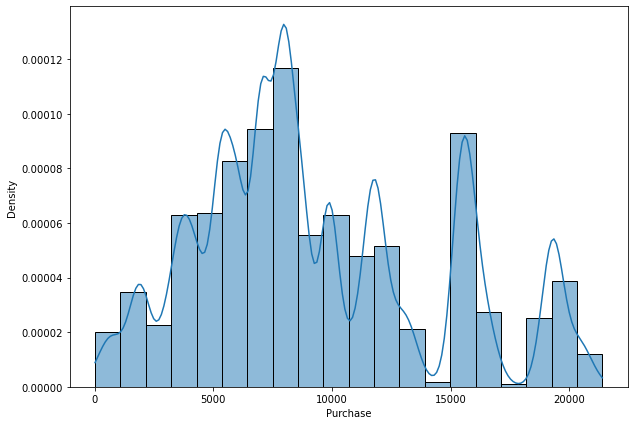

In [30]:
plt.figure(figsize=(10,7))
sns.histplot(dp.Purchase,bins=20,kde=True,stat='density')
plt.plot()

[]

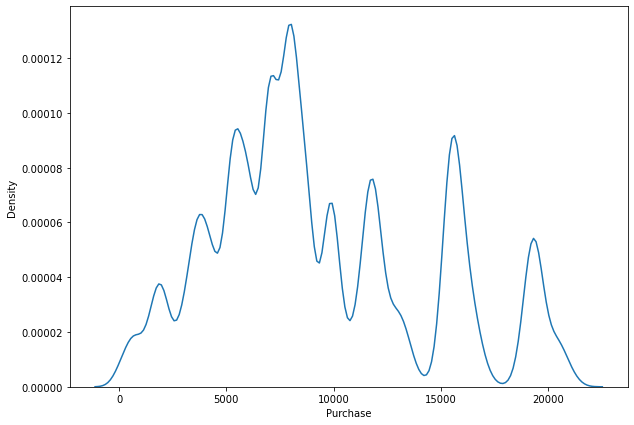

In [31]:
plt.figure(figsize=(10,7))
sns.kdeplot(dp.Purchase)
plt.plot()

[]

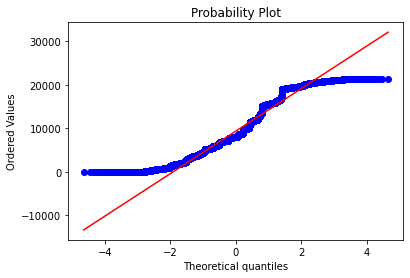

In [32]:

stats.probplot(dp.Purchase,dist='norm',plot=plt)
plt.plot()

In [33]:
iteration=1000
bootstrap_mean2=[]
sample_size=50000
for i in range (iteration):
    s=resample(dp.Purchase,n_samples=sample_size)
    M=np.mean(s)
    bootstrap_mean2.append(M)
confidence=.50
LOWER,UPPER=np.percentile(bootstrap_mean2,[5,95])
print(LOWER)
print(UPPER)


9331.899478
9404.495941000001


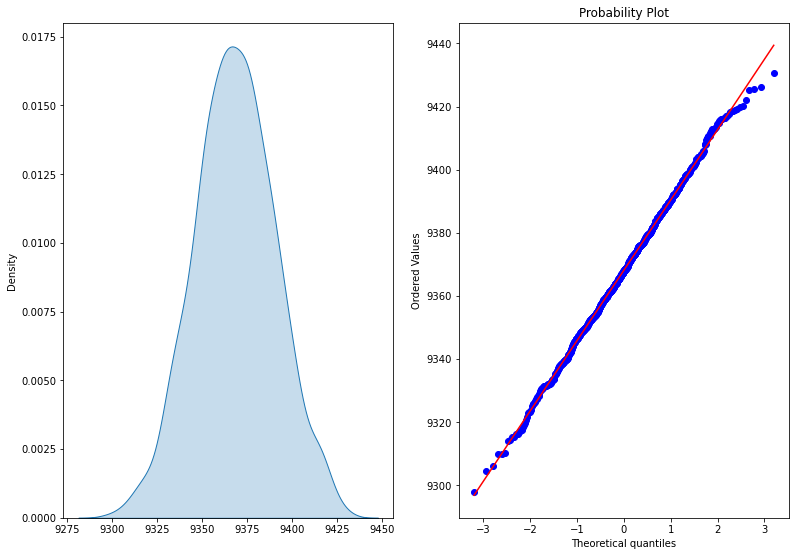

In [34]:

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.subplots_adjust(top=1.5)
sns.kdeplot(bootstrap_mean2,fill=True,ax=axis[0])
stats.probplot(bootstrap_mean2,dist='norm',plot=axis[1])
plt.show()


* What is the confidence interval of purchasing 50% by male  
     * confidence interval of purchasing 50% lies between 9332.201269 and 9400.373

* What is the confidence interval of purchasing 90% by male  
     * confidence interval of purchasing 90% lies between 9350.62 and 9381.89

# What is the maximum amount of purchase by female?

In [35]:
dp.Purchase.max()

21399

# What is the 90%,50% confidence interval of purchasing by famale?

### Purchasing by female 

In [36]:
dpf=data[data.Gender=='F']
dpf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [37]:
dpf.Purchase.mean()

8671.049038603756

[]

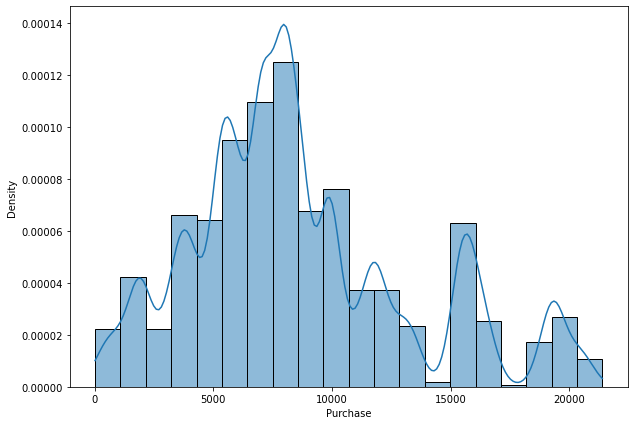

In [38]:
plt.figure(figsize=(10,7))
sns.histplot(dpf.Purchase,bins=20,kde=True,stat='density')
plt.plot()

[]

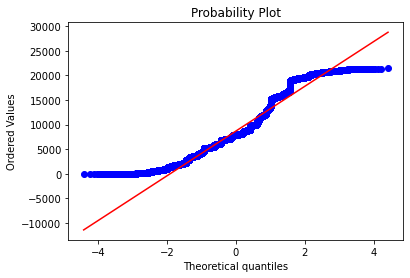

In [39]:
stats.probplot(dpf.Purchase,dist='norm',plot=plt)
plt.plot()

In [40]:
iteration=1000
bootstrap_mean3=[]
sample_size=50000
for i in range(iteration):
    s=resample(dpf.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_mean3.append(m)
confidence=.50
upper,lower=np.percentile(bootstrap_mean3,[25,75])
print(upper)
print(lower)

8655.91623
8683.531485


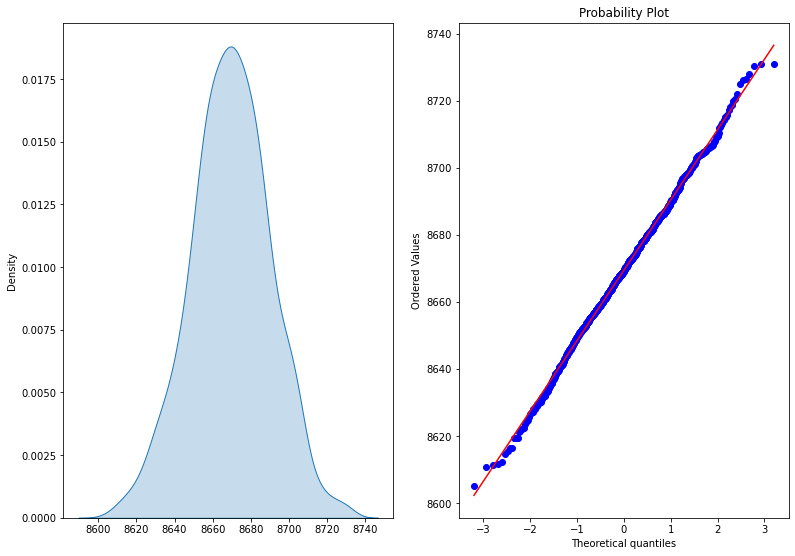

In [41]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.subplots_adjust(top=1.5)
sns.kdeplot(bootstrap_mean3,fill=True,ax=axis[0])
stats.probplot(bootstrap_mean3,dist='norm',plot=axis[1])
plt.show()


* What is the confidence interval of purchasing 50% by female  
     * confidence interval of purchasing 50% lies between 8656.85 and 8684.455

* What is the confidence interval of purchasing 90% by female  
     * confidence interval of purchasing 50% lies between 8635.628 and 8706.990

#### Over view:
* Average purchasing done by male is 9367.724354
* Average purchasing done by female is 8671.04903
* From this we can say that mostly purchasing is done by male than female.

# What is the maximum amount of purchase by female

In [42]:
dpf.Purchase.max()

21398

# Distribution of the mean of the expenses by female and male customers  different sample_size

### Sample size=1000

In [43]:
iteration=1000
bootstrap_meanf=[]
sample_size=1000
for i in range(iteration):
    s=resample(dpf.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanf.append(m)
confidence=.90
upper,lower=np.percentile(bootstrap_meanf,[5,95])
print(upper)
print(lower)

8431.87145
8911.06665


In [44]:
iteration=1000
bootstrap_meanm=[]
sample_size=1000
for i in range(iteration):
    s=resample(dp.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanm.append(m)
confidence=.90
upper,lower=np.percentile(bootstrap_meanm,[5,95])
print(upper)
print(lower)

9117.377499999999
9628.34825


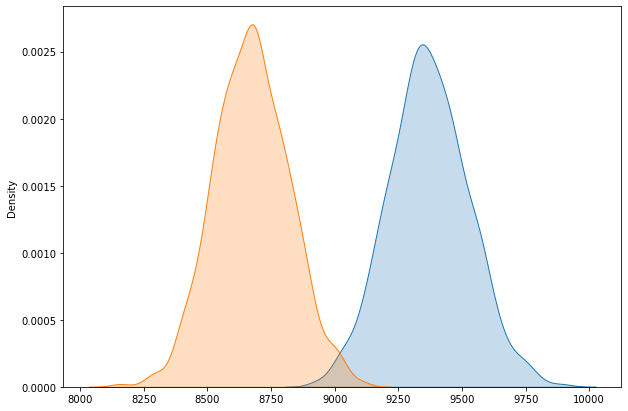

In [45]:
plt.figure(figsize=(10,7))
sns.kdeplot(bootstrap_meanm,fill=True)
sns.kdeplot(bootstrap_meanf,fill=True)
plt.show()

### Sample_size=500

In [46]:
iteration=1000
bootstrap_meanf1=[]
sample_size=500
for i in range(iteration):
    s=resample(dpf.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanf1.append(m)
confidence=.90
upper,lower=np.percentile(bootstrap_meanf1,[5,95])
print(upper)
print(lower)

8328.8089
8999.2724


In [47]:
iteration=1000
bootstrap_meanm1=[]
sample_size=500
for i in range(iteration):
    s=resample(dp.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanm1.append(m)
confidence=.90
upper,lower=np.percentile(bootstrap_meanm1,[5,95])
print(upper)
print(lower)

9030.5036
9740.3189


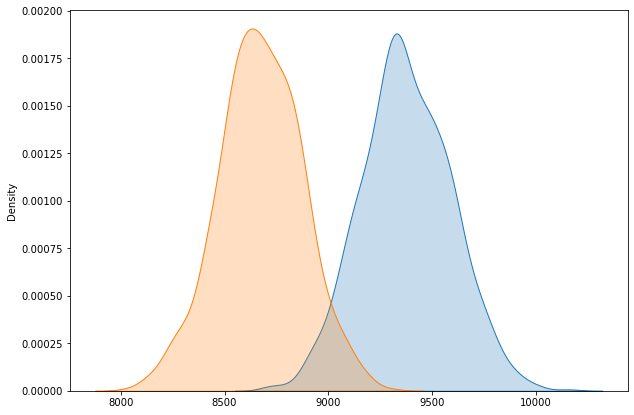

In [48]:
plt.figure(figsize=(10,7))
sns.kdeplot(bootstrap_meanm1,fill=True)
sns.kdeplot(bootstrap_meanf1,fill=True)
plt.show()

* It show that while decrease the size of sample size it cause the increase of range of average purchase of female and male .
* Decrease size of sample size it leads to overlapping of average purchase.
* Both male and female  spend certain amount for purchasing, around the range of 8600 to 9400.


# Marital_status

[]

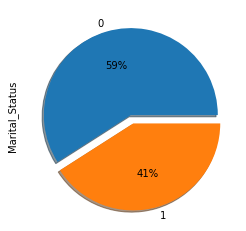

In [49]:
data.Marital_Status.value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.plot()

* 59% people are unmarried
* 41% people are married

# Expenses by married and unmarried 

###  Unmarried

In [50]:
U=data[data.Marital_Status==0]
U

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,254
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


In [51]:
U.Purchase.mean()

9201.581848893398

In [52]:
U.Purchase.max()

21399

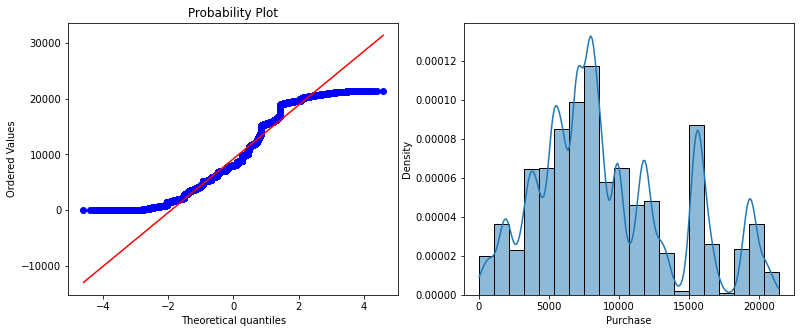

In [53]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(13,5))
stats.probplot(U.Purchase,dist='norm',plot=axis[0])
sns.histplot(U.Purchase,stat='density',kde=True,bins=20,ax=axis[1])
plt.show()

### Converting to normal distribution

In [54]:
iteration=1000
bootstrap_meanu=[]
sample_size=100000
for i  in range (iteration):
    s=resample(U.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanu.append(m)
confidence=.90
upper,lower=np.percentile(U.Purchase,[5,95])
print(upper,lower)

1996.0 19279.0


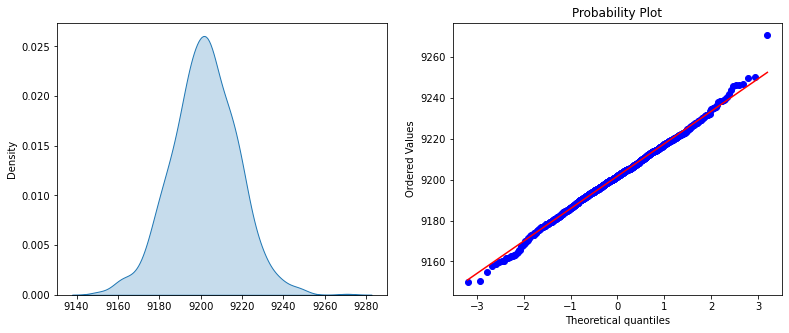

In [55]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.kdeplot(bootstrap_meanu,fill=True,ax=axis[0])
stats.probplot(bootstrap_meanu,dist='norm',plot=axis[1])
plt.show()


# What is the 90% confidence interval of unmarried

ANS: confidence interval of purchasing 90% lies between 1996.0  and 19279.0

### Married

In [56]:
M=data[data.Marital_Status==1]
M

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


In [57]:
M.Purchase.mean()

9187.040076020861

In [58]:
M.Purchase.max()

21398

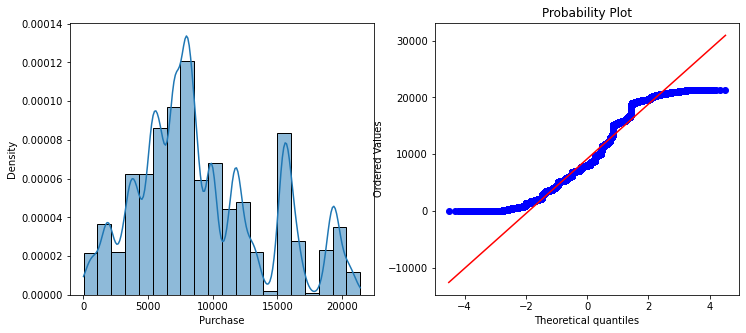

In [59]:
fig,axis1=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(M.Purchase,stat='density',kde=True,ax=axis1[0],bins=20)
stats.probplot(M.Purchase,dist='norm',plot=axis1[1])
plt.show()

### Converting to normal distribution

In [60]:
iteration=1000
bootstrap_meanm=[]
sample_size=100000
for i  in range (iteration):
    s=resample(M.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanm.append(m)
confidence=.90
Upper,Lower=np.percentile(M.Purchase,[5,95])
print(Upper,Lower)

1961.0 19257.0


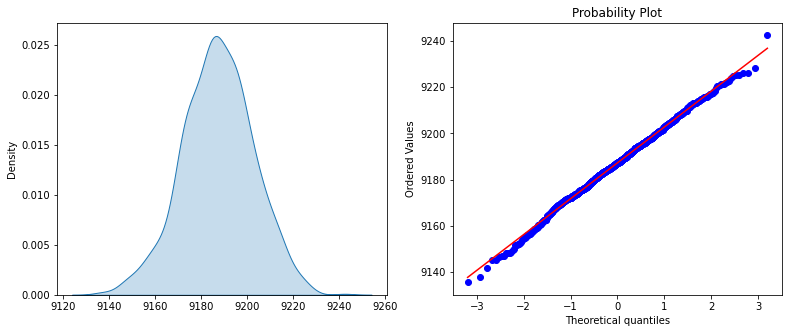

In [61]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.kdeplot(bootstrap_meanm,fill=True,ax=axis[0])
stats.probplot(bootstrap_meanm,dist='norm',plot=axis[1])
plt.show()


# What is the 90% confidence interval of unmarried

ANS: confidence interval of purchasing 90% lies between 1961.0 and  19257.0



# Distribution of mean expenses by married and unmarried in different sample_size

### Sample_size =100000

In [ ]:
sns.kdeplot(bootstrap_meanm,fill=True)
sns.kdeplot(bootstrap_meanu,fill=True)
plt.show()

### Sample_size =10000

In [ ]:
# unmarried
iteration=1000
bootstrap_meanu=[]
sample_size=10000
for i  in range (iteration):
    s=resample(U.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanu.append(m)
confidence=.90
upper,lower=np.percentile(U.Purchase,[5,95])
print(upper,lower)

In [ ]:
# married
iteration=1000
bootstrap_meanm=[]
sample_size=10000
for i  in range (iteration):
    s=resample(M.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanm.append(m)
confidence=.90
Upper,Lower=np.percentile(M.Purchase,[5,95])
print(Upper,Lower)

In [ ]:
sns.kdeplot(bootstrap_meanm,fill=True)
sns.kdeplot(bootstrap_meanu,fill=True)
plt.show()

* The average amount of purchasing by unmarried people is 9201.581 and max amount is 21399
* The average amount of purchasing by married people is 9187.040 and max amount is 21398
* Through analysing this we can say that both married and unmarried peoples are spend almost same for purchasing 
* While decrease the size of sample the we can see  average range of purchasing overlapping its implies that almost they spend 
  same for purchasing


# which age category done more purchase?

[]

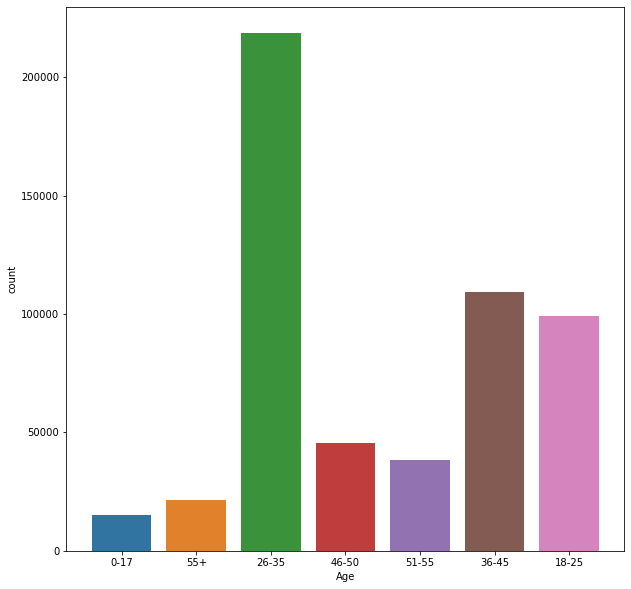

In [116]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Age,data=data)
plt.plot()

* People who have age in between 26-35 done more purchase 
* People have age in between 0-17 done least purchase

# Distribution of mean expenses by Age

### 0-17

In [ ]:
age1=data[data.Age=='0-17']
age1

In [ ]:
fig,axis1=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(age1.Purchase,stat='density',kde=True,ax=axis1[0],bins=20 )
stats.probplot(age1.Purchase,dist='norm',plot=axis1[1])
plt.show()

## Converting to normal distribution

In [ ]:
iteration=1000
bootstrap_meanag1=[]
sample_size=5000
for i  in range (iteration):
    s=resample(age1.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanag1.append(m)
confidence=.90
Upper,Lower=np.percentile(age1.Purchase,[5,95])
print(Upper,Lower)

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.kdeplot(bootstrap_meanag1,fill=True,ax=axis[0])
stats.probplot(bootstrap_meanag1,dist='norm',plot=axis[1])
plt.show()


# What is the 90% of confidence interval of persons who have age 0-17

ANS: The 90% confidence interval of persons who have age 0-17 is lies between 1753.0 and 19256.89

### 18-25

In [ ]:
age2=data[data.Age=='18-25']
age2

In [ ]:
fig,axis1=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(age2.Purchase,stat='density',kde=True,ax=axis1[0],bins=20 )
stats.probplot(age2.Purchase,dist='norm',plot=axis1[1])
plt.show()

## Converting to normal distribution

In [ ]:
iteration=1000
bootstrap_meanag2=[]
sample_size=5000
for i  in range (iteration):
    s=resample(age2.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanag2.append(m)
confidence=.90
Upper,Lower=np.percentile(age2.Purchase,[5,95])
print(Upper,Lower)

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.kdeplot(bootstrap_meanag2,fill=True,ax=axis[0])
stats.probplot(bootstrap_meanag2,dist='norm',plot=axis[1])
plt.show()

# What is the 90% of confidence interval of persons who have age 18-25

ANS: The 90% confidence interval of persons who have age 18-25 is lies between 1962.0  and 19293.0

### 26-35 

In [ ]:
age3=data[data.Age=='26-35' ]
age3

In [ ]:
fig,axis1=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(age3.Purchase,stat='density',kde=True,ax=axis1[0],bins=20 )
stats.probplot(age3.Purchase,dist='norm',plot=axis1[1])
plt.show()

## Converting to normal distribution

In [ ]:
iteration=1000
bootstrap_meanag3=[]
sample_size=5000
for i  in range (iteration):
    s=resample(age3.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanag3.append(m)
confidence=.90
Upper,Lower=np.percentile(age3.Purchase,[5,95])
print(Upper,Lower)

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.kdeplot(bootstrap_meanag3,fill=True,ax=axis[0])
stats.probplot(bootstrap_meanag3,dist='norm',plot=axis[1])
plt.show()

# What is the 90% of confidence interval of persons who have age 26-50

ANS: The 90% confidence interval of persons who have age 26-35 is lies between 2026.0  and 19272.0

## 36-50

In [ ]:
age4=data[(data.Age=='36-45')|(data.Age=='46-50')]
age4

In [ ]:
fig,axis1=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(age4.Purchase,stat='density',kde=True,ax=axis1[0],bins=20 )
stats.probplot(age4.Purchase,dist='norm',plot=axis1[1])
plt.show()

## Converting to normal distribution

In [ ]:
iteration=1000
bootstrap_meanag4=[]
sample_size=5000
for i  in range (iteration):
    s=resample(age4.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanag4.append(m)
confidence=.90
Upper,Lower=np.percentile(age4.Purchase,[5,95])
print(Upper,Lower)

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.kdeplot(bootstrap_meanag4,fill=True,ax=axis[0])
stats.probplot(bootstrap_meanag4,dist='norm',plot=axis[1])
plt.show()

# What is the 90% of confidence interval of persons who have age 36-50

In [ ]:
ANS: The 90% confidence interval of persons who have age 26-35 is lies between 1982.0 and  19238.0

## 51+

In [ ]:
age5=data[(data.Age=='51-55')|(data.Age=='55+')]
age5

In [ ]:
fig,axis1=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.histplot(age5.Purchase,stat='density',kde=True,ax=axis1[0],bins=20 )
stats.probplot(age5.Purchase,dist='norm',plot=axis1[1])
plt.show()

## Converting to normal distribution

In [ ]:
iteration=1000
bootstrap_meanag5=[]
sample_size=5000
for i  in range (iteration):
    s=resample(age5.Purchase,n_samples=sample_size)
    m=np.mean(s)
    bootstrap_meanag5.append(m)
confidence=.90
Upper,Lower=np.percentile(age5.Purchase,[5,95])
print(Upper,Lower)

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.kdeplot(bootstrap_meanag4,fill=True,ax=axis[0])
stats.probplot(bootstrap_meanag4,dist='norm',plot=axis[1])
plt.show()

# What is the 90% of confidence interval of persons who have age 51+

In [ ]:
ANS: The 90% confidence interval of persons who have age 26-35 is lies between 1833.6 and 19307.0

In [ ]:
plt.figure(figsize=(10,7))
sns.kdeplot(bootstrap_meanag1,fill=True)
sns.kdeplot(bootstrap_meanag2,fill=True)
sns.kdeplot(bootstrap_meanag3,fill=True)
sns.kdeplot(bootstrap_meanag4,fill=True)
sns.kdeplot(bootstrap_meanag5,fill=True)
plt.legend(['age1','age2','age3','age4','age5'])
plt.show()

* From this diagram we can say that the persons who have age 18-25,26-35,36-50 they mostly spend for average purchase in the  range of  9100 to 9300
* Person have age 0-17 they spend for their average purchase in the range of 8600 to 9150
* Person have age 18-25 they spend for their average purchase in the range of 8900 to 9250
* Person have age 26-35 they spend for their average purchase in the range of 9000 to 9350
* Person have age 36-50 they spend for their average purchase in the range of 9010 to 9420
* Person have age 51+ they spend for their average purchase in the range of 9100 to 9600


    
  

In [ ]:
data.Age.unique()

# Gender influence

In [ ]:
sns.histplot(x='Gender',data=df)
plt.plot()

* count of male purchasing product is greater than female
* count of female around 150000
* count of male around 400000

# Which gender done more transaction?

[]

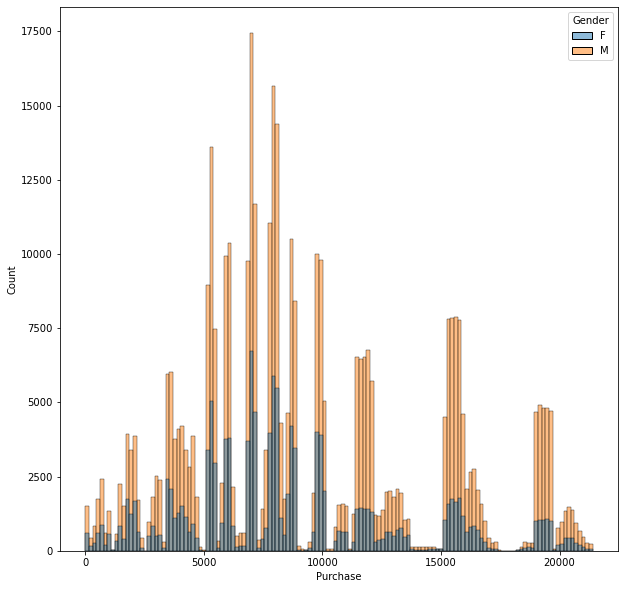

In [112]:
plt.figure(figsize=(10,10))
sns.histplot(x=data.Purchase,hue='Gender',data=data)
plt.plot()

* Male done more transaction than female

# City category

## Which city have more purchase rate ?

[]

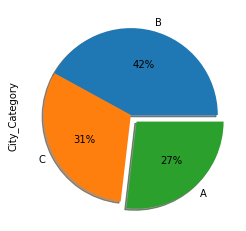

In [113]:
df.City_Category.value_counts().plot.pie(explode=(0,0,0.1),autopct="%.0f%%",shadow=True)
plt.plot()

* 42% people who purchase product is from city category 'B'
* People from city category 'C' purchase 31%
* city category 'A' have small percentage of record of purchase the product


# Product_Category

# Which product purchase mostly in all cities?

[]

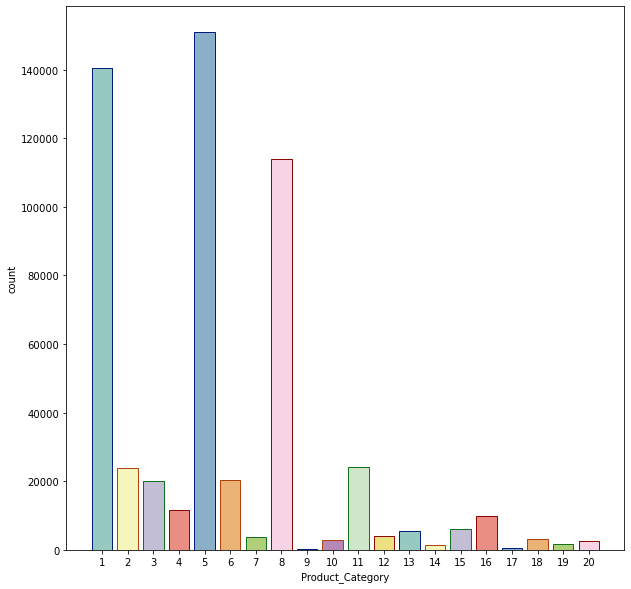

In [115]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Product_Category,data=data,palette="Set3",edgecolor=sns.color_palette("dark", 4))
plt.plot()

* From this we can say that most of the people from all city category purchase product 7 compaired to other product
* Later 7 ,product 1 and after that product 8  purchased mostly.
* Product 9,17 have least record of purchase 

# Product category v/s purchases

In [ ]:
da=data[data.City_Category=='A']
da

# Which producct took more rate in city A?

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=da.Product_Category,y=da.Purchase,data=da)
plt.plot()

* In city A product 10 own highest purchase rate compaired to other product
* After 10 ,7 have next highest purchase rate
* product 20 took cheapest purchase rate

# Which product took more purchase rate purchased by male and women in city A ?

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=da.Product_Category,y=da.Purchase,data=da,hue='Gender',linewidth=5)
plt.plot()


* In city 'A'  we can say that mostly product is purchased by female more than male.
* Product 7,10 is mostly purchased by male and female 
* Product 7
    * Male purchase product 7 around 15900
    * Female purchase product 7 around 16200
* Similarly product 10
    * Male purchase product 7 around 15900
    * Female purchase product 7 around 16200
* Product 19 is the product least purchased by both male and female.
* Product 6,8 is equally purchased by moth male and female .
* product 9,16 is mostly purchased by male rather than female.

    

# Which product own more price in city 'B'?

In [118]:
db=data[data.City_Category=='B']
db

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
18,1000007,P00036842,M,36-45,1,B,1,1,1,11788
29,1000010,P00085942,F,36-45,1,B,4+,1,2,16352
...,...,...,...,...,...,...,...,...,...,...
550053,1006017,P00371644,F,36-45,7,B,1,0,20,371
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


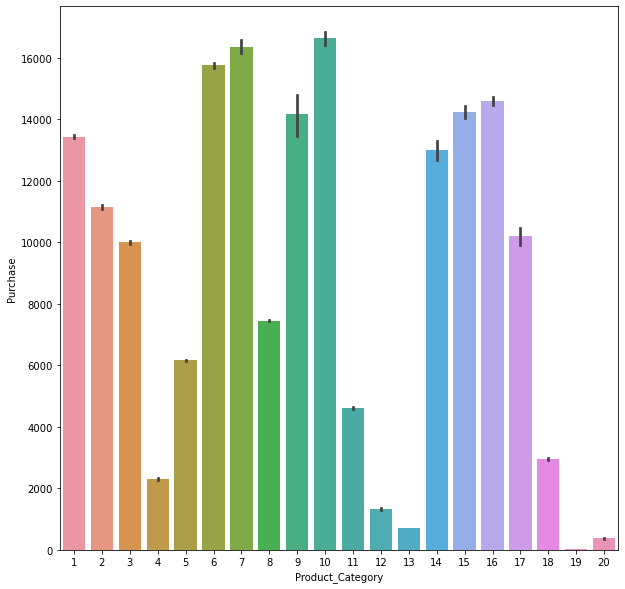

In [119]:
plt.figure(figsize=(10,10))
sns.barplot(x=db.Product_Category,y=db.Purchase,data=db)
plt.show()

* In city 'C' product 10 own highest purchase rate compaired to other product
* After product 10 ,7and 6 have highest purchase rate
* Also like city 'A',in city 'B' have least purchase rate in product 19  

#  Which product took more purchase rate purchased by male and women in city B ?

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=db.Product_Category,y=db.Purchase,data=db,hue='Gender',linewidth=5)
plt.plot()

* In city 'B'  we can say that mostly product is purchased by female more than male.
* Product 7,10 is mostly purchased by male and female 
* Product 7
    * Male purchase product 7 around 15900
    * Female purchase product 7 around 16200
* Similarly product 10
    * Male purchase product 7 around 15900
    * Female purchase product 7 around 16200
* Product 19 is the product least purchased by both male and female.
* Product 1,13,20 is equally purchased by moth male and female .
* product 2,3,4,5,14,15, 16 is mostly purchased by male rather than female..
* Compairing both city 'A' and 'B' we can say that number of product purchasing rate by males are increasing 
    

# Which product own more price in city 'C'?

In [121]:
dc=data[data.City_Category=='C']
dc

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
19,1000008,P00249542,M,26-35,12,C,4+,1,1,19614
20,1000008,P00220442,M,26-35,12,C,4+,1,5,8584
21,1000008,P00156442,M,26-35,12,C,4+,1,8,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,9743
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


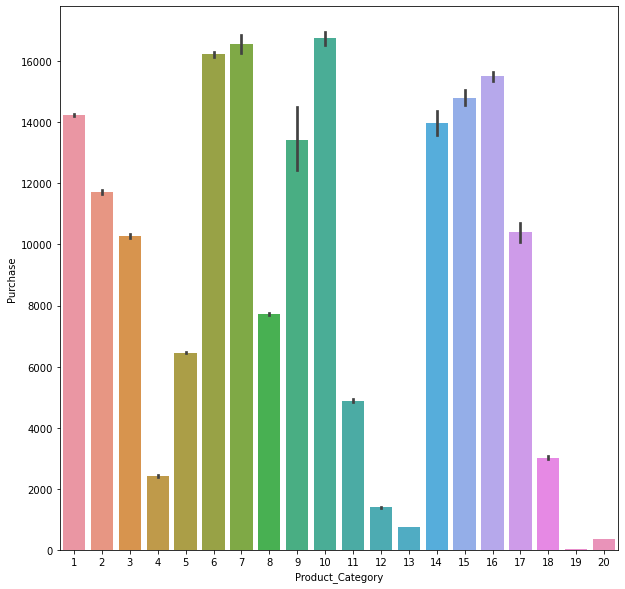

In [122]:
plt.figure(figsize=(10,10))
sns.barplot(x=dc.Product_Category,y=dc.Purchase,data=dc)
plt.show()

* In city 'C' product 10 own highest purchase rate compaired to other product
* After product 10 ,7and 6 have highest purchase rate
* Also like city 'A',in city 'C' have least purchase rate in product 19  

#  Which product took more purchase rate purchased by male and women in city C ?

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=dc.Product_Category,y=dc.Purchase,data=dc,hue='Gender',linewidth=5)
plt.plot()


* In city 'C'  we can say that mostly product is purchased by female more than male.
* Product 7,10 is mostly purchased by male and female 
* Product 7
    * Male purchase product 7 around 15900
    * Female purchase product 7 around 16200
* Similarly product 10
    * Male purchase product 7 around 15900
    * Female purchase product 7 around 16300
* Product 19 is the product least purchased by both male and female.
* Product 1,13,20 is equally purchased by moth male and female .
* product 2,3,5,14,15, 16 is mostly purchased by male rather than female.
* Similarly like 'B' ,in  'C' we can say that number of product purchasing rate by males are increasing 
    

# Age v/s Purchase v/s City_category

[]

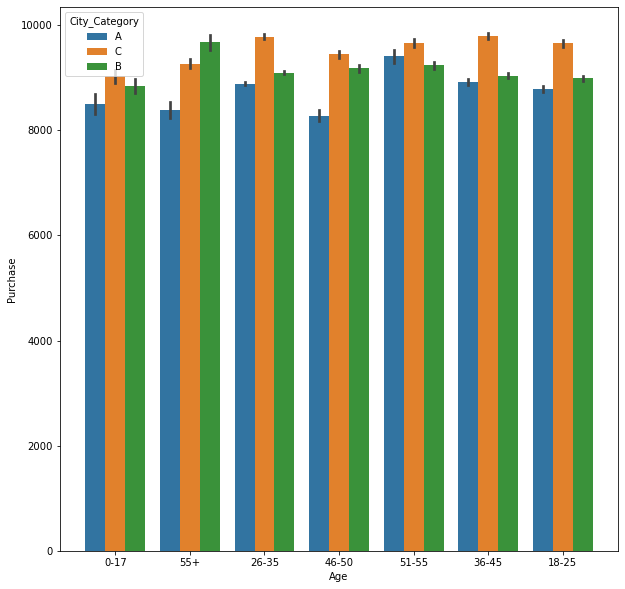

In [125]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.Age,y= data.Purchase,data=data,hue='City_Category')
plt.plot()

# FEMALE PURCHASING IN DIFFERENT CITY CATEGORY

[]

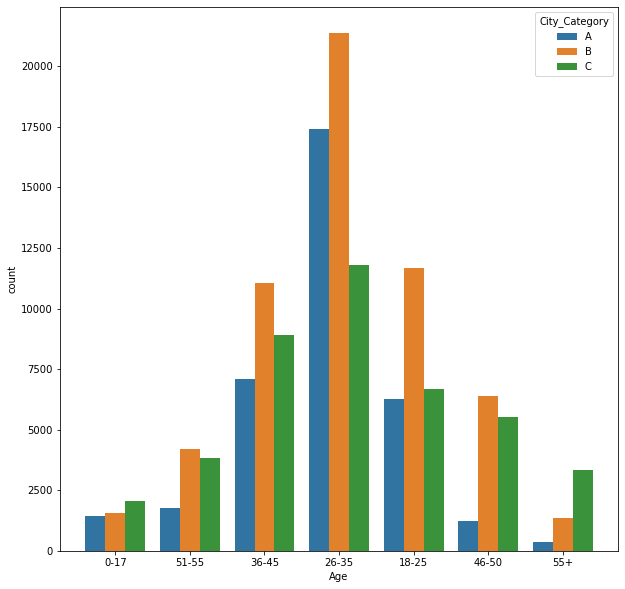

In [123]:
plt.figure(figsize=(10,10))
sns.countplot(x=dpf.Age,data=dpf,hue='City_Category')
plt.plot()

* Female have age in between 26-35 done more purchase compaired to other people
* As we look about city we can say female have age 26-35 in city B have more purchase rate rather than other cities
   * In City A :around 17500 female
   * city B :around 22500 female
   * city C :around 12500 female
* female in age 55+ have low rate of purchase,but around 2500 female in city C purchase products
* Also female in age 0-17 have  rate below 2500 in purchase 

# MALE PURCHASING IN DIFFERENT CITY CATEGORY

[]

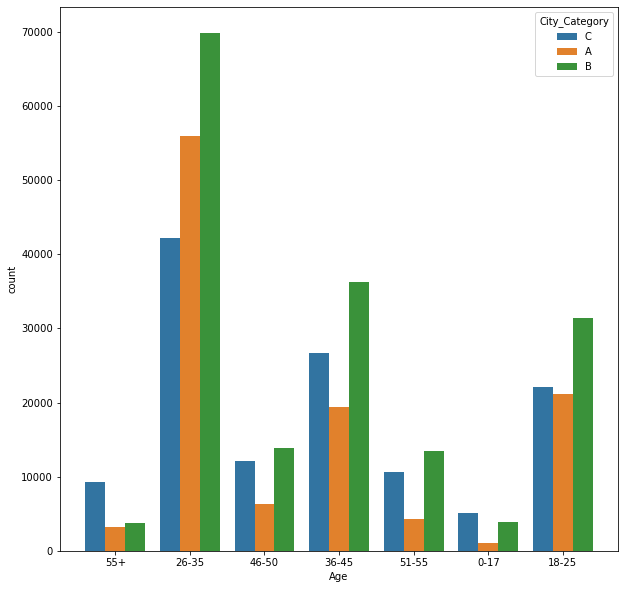

In [124]:
plt.figure(figsize=(10,10))
sns.countplot(x=dp.Age,data=dp,hue='City_Category')
plt.plot()

* Male have age in between 26-35 done more purchase compaired to other ages
* As we look about city we can say male have age 26-35 in city B have more purchase rate rather than other cities
   * In City A :around 55000 male
   * city B :around 70000 male
   * city C :around 40000 male
* Male in age 55+ have low rate of purchase,but around 10000 male in city C purchase products
* Also male in age 0-17 have  rate below 5000 in purchase 

# Correlation

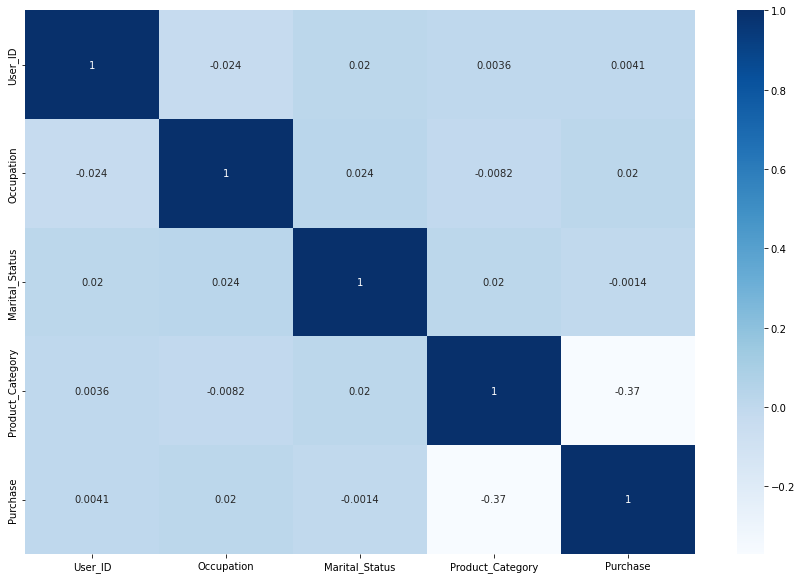

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.show()

What is a Correlation Coefficient? 
* A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship 
 between two variables.
* The closer the value is to 1 (or -1), the stronger a relationship. 
* The closer a number is to 0, the weaker the relationship. A negative coefficient will tell us that the relationship is    negative,
  meaning that as one value increases, the other decreases. 
* Similarly, a positive coefficient indicates that as one value increases, as does the other.

* From this heatmap we can say the heighest correlation coefficient is 0.024 and after that 0.02

* ie if the rate of marital_status increases the rate of occupation increases
* Also marital status influence user_id.



# Top 10 users who purchase more product

In [ ]:
data['User_ID'].value_counts().head(10)

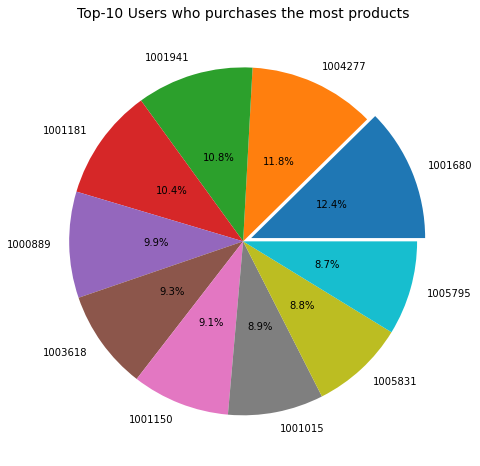

In [103]:
plt.figure(figsize=(10,8))
labels = data['User_ID'].value_counts().head(10).index
plt.pie(x=data['User_ID'].value_counts().head(10).values,autopct="%.1f%%",
        explode=[0.05,0,0,0,0,0,0,0,0,0],labels=labels,pctdistance=0.5)
plt.title("Top-10 Users who purchases the most products", fontsize=14)
plt.show()

* In top 10 users
    * Userid :1001680 purchase 12.4%
    * userid:1004277 purchase 11.8%

In [68]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# How many customer belongs to each occupation on each city_category?

In [69]:
c=pd.DataFrame(data.groupby('Occupation')['City_Category'].value_counts().sort_values(ascending=False))
c

,,City_Category
Occupation,City_Category,
4,B,29739
0,B,29712
4,A,24117
7,B,22904
0,C,20820
...,...,...
8,B,824
9,A,708
8,C,612


# Percentage of each occupation ?

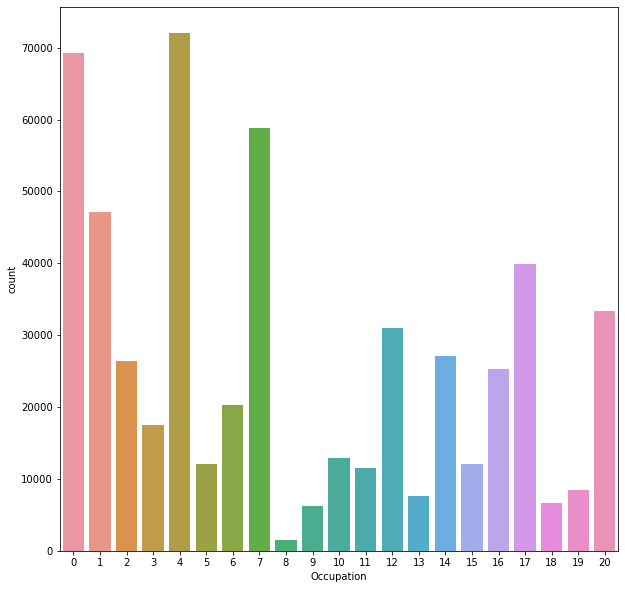

In [86]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Occupation'])
plt.show()

* Above 70000 customers purchase in walmart are occupaid in 4
* least customers purchase in walmart are occupaid in 8


In [74]:
data['Occupation'].value_counts()

4     72040
0     69310
7     58875
1     47174
17    39855
20    33355
12    30995
14    27173
2     26435
16    25251
6     20261
3     17568
10    12888
5     12133
15    12086
11    11500
19     8412
13     7667
18     6595
9      6278
8      1540
Name: Occupation, dtype: int64

# How customers stay_year related in purchase?

In [107]:
purchase_cou=data.groupby('Stay_In_Current_City_Years')['Purchase'].count().to_frame().reset_index()
purchase_cou

,Stay_In_Current_City_Years,Purchase
0,0,74036
1,1,192845
2,2,101384
3,3,94804
4,4+,84322


[]

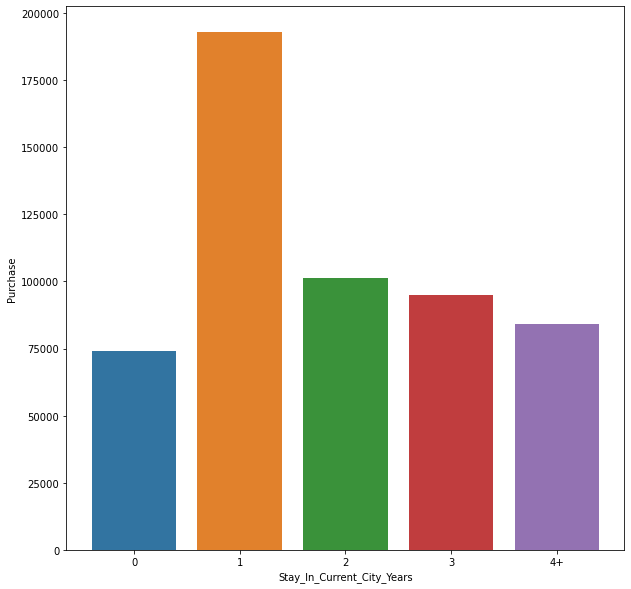

In [111]:
plt.figure(figsize=(10,10))
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=purchase_cou)
plt.plot()

 * customer stays 1 year purchase more product than others who stays more than 1 year

# Which amount of  selling is mostly repeated?

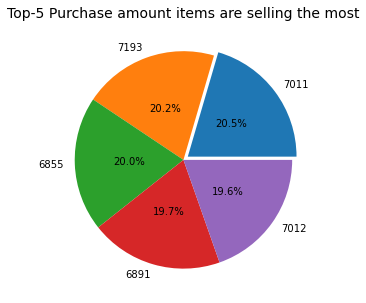

In [126]:
plt.figure(figsize=(10,5))
labels = data['Purchase'].value_counts().head(5).index
plt.pie(x=data['Purchase'].value_counts().head(5).values,autopct="%.1f%%",explode=[0.05,0,0,0,0],labels=labels,pctdistance=0.5)
plt.title("Top-5 Purchase amount items are selling the most", fontsize=14)
plt.show()

* Customers are mostly purchasing 7011 rupess 

# RECOMMENDATION

* Mostly males are purchasing product rather than female .21398 amount is female used to purchase.21399 amount is male used 
  to purchase. so focusing men related items may cause more profit

* Compaired to married people unmarried peoples are mostly purchasing product .The average transaction is more in unmarried
  people.so if we give more priority to unmarried choice it cause increase the rate of purchase

* Who have age 18-25,26-35,36-50 they mostly spend for average purchase in the range of 9100 to 9300.And People who have age in between 26-35 done more
  purchase.So considering these category of peoples leads to the growth of selling
    
* Considering all cities ,mostly selled product is 7compaired to other product. Later 7 ,product 1 and after that product 8 
  purchased mostly.Product 9,17 have least record of purchase.so increasing selling product 7,1 and 8 cause more profit

* In city A,B,C product 10 own highest purchase rate compaired to other product.After product 10 ,7and 6 have highest purchase
  rate.Also like city 'A',in city 'C' have least purchase rate in product 19.So using product 10 can cause more purchase rate
    
* Above 70000 customers purchase in walmart are occupaid in 4.And number of customers more  occupatied in occupation 4.so focusing people occupaid in 4 can make profit.

* People in city category B purchase more product compaired to other city .so give focuse on city B

